# SQL

## Exploration

Let's use DBeaver, a universal database client for developers, SQL programmers, database administrators and analysts.

https://dbeaver.io/

## ERD Diagram

When discovering a new database, a data scientist should explore and draw the Entity Relationship Diagram.

https://www.visual-paradigm.com/guide/data-modeling/what-is-entity-relationship-diagram/

👉 Useful tool: kitt.lewagon.com/db (Save XML)

https://kitt.lewagon.com/db

https://online.visual-paradigm.com/diagrams/solutions/free-erd-tool/

https://gitmind.com/er-diagram-tool.html

## SQLite

A database stored in a single file.

👉 https://www.sqlite.org/index.html


For the examples below, we use the 👉 European Soccer Database on Kaggle

https://www.kaggle.com/hugomathien/soccer/

### Connecting To The Database

#### Reaching for the sqlite3 package.

In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

In [3]:
c.execute("SELECT * FROM Country")
rows = c.fetchall()
rows

[(1, 'Belgium'),
 (1729, 'England'),
 (4769, 'France'),
 (7809, 'Germany'),
 (10257, 'Italy'),
 (13274, 'Netherlands'),
 (15722, 'Poland'),
 (17642, 'Portugal'),
 (19694, 'Scotland'),
 (21518, 'Spain'),
 (24558, 'Switzerland')]

#### You can also fetch a list of sqlite3.Row elements:

https://docs.python.org/3/library/sqlite3.html#sqlite3.Row

In [3]:
conn = sqlite3.connect('data/soccer.sqlite')
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [4]:
c.execute("SELECT * FROM Country")
rows = c.fetchall()
first_row = rows[0]

In [8]:
first_row['name']

'Belgium'

In [11]:
tuple(first_row)

(1, 'Belgium')

#### Fetching only one element

Sometimes you know that your query will yield only one (or zero!) element. Then use fetchone:

https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchone

In [12]:
c.execute("SELECT * FROM Country WHERE Country.id = 1")
row = c.fetchone()
print(row[0], '-' ,row[1])

1 - Belgium


In [15]:
c.execute("SELECT * FROM Country WHERE Country.id = 2")
row = c.fetchone()
print(row)

None


### SQL Basics

In [6]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

#### Projection

Choosing which columns the query shall return.

🤔 Retrieve id, season, stage and date of all matches

In [15]:
query = '''
    SELECT "Match".id, "Match".season, "Match".stage, "Match".date 
    FROM "Match"
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]


Rows Returned: 25979


[(1, '2008/2009', 1, '2008-08-17 00:00:00'),
 (2, '2008/2009', 1, '2008-08-16 00:00:00'),
 (3, '2008/2009', 1, '2008-08-16 00:00:00'),
 (4, '2008/2009', 1, '2008-08-17 00:00:00'),
 (5, '2008/2009', 1, '2008-08-16 00:00:00'),
 (6, '2008/2009', 1, '2008-09-24 00:00:00'),
 (7, '2008/2009', 1, '2008-08-16 00:00:00'),
 (8, '2008/2009', 1, '2008-08-16 00:00:00'),
 (9, '2008/2009', 1, '2008-08-16 00:00:00'),
 (10, '2008/2009', 10, '2008-11-01 00:00:00')]

💡Tip: You can alias tables name for enhanced readability

In [16]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date
    FROM "Match" AS matches
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 25979


[(1, '2008/2009', 1, '2008-08-17 00:00:00'),
 (2, '2008/2009', 1, '2008-08-16 00:00:00'),
 (3, '2008/2009', 1, '2008-08-16 00:00:00'),
 (4, '2008/2009', 1, '2008-08-17 00:00:00'),
 (5, '2008/2009', 1, '2008-08-16 00:00:00'),
 (6, '2008/2009', 1, '2008-09-24 00:00:00'),
 (7, '2008/2009', 1, '2008-08-16 00:00:00'),
 (8, '2008/2009', 1, '2008-08-16 00:00:00'),
 (9, '2008/2009', 1, '2008-08-16 00:00:00'),
 (10, '2008/2009', 10, '2008-11-01 00:00:00')]

#### Selection

Selecting which rows the query shall return.

🤔 Retrieve matches which happened in France

In [25]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id = 4769
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 3040


[(4769, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4770, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4771, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4772, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4773, '2008/2009', 1, '2008-08-10 00:00:00', 4769),
 (4774, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4775, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4776, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4777, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4778, '2008/2009', 1, '2008-08-09 00:00:00', 4769)]

---

🤔 Retrieve matches which happened in Belgium or England

In [24]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id = 1
    OR matches.country_id = 1729
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 4768


[(1, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (2, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (3, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (4, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (5, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (6, '2008/2009', 1, '2008-09-24 00:00:00', 1),
 (7, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (8, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (9, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (10, '2008/2009', 10, '2008-11-01 00:00:00', 1)]

---

Alternative:

**Note: the WHERE ... IN ... list needs to be passed as a tuple!!**

In [29]:
country_ids = (1,1729)

query = f'''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id IN {country_ids}
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 4768


[(1, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (2, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (3, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (4, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (5, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (6, '2008/2009', 1, '2008-09-24 00:00:00', 1),
 (7, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (8, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (9, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (10, '2008/2009', 10, '2008-11-01 00:00:00', 1)]

- - -

🤔 Retrieve players named John

In [32]:
query = '''
    SELECT *
    FROM Player
    WHERE UPPER(Player.player_name) LIKE "JOHN %"
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0]

Rows Returned: 31


(5093,
 278831,
 'John Anthony Brooks',
 204082,
 '1993-01-28 00:00:00',
 193.04,
 172)

#### Counting

Counting the number of rows matching the selection

🤔 How many players are taller than 2.00 meters?

In [36]:
query = '''
    SELECT COUNT(Player.id)
    FROM Player
    WHERE Player.height >= 200
'''

c.execute(query)
rows = c.fetchone()

print(f'Rows Returned: {len(rows)}')

rows[0]

Rows Returned: 1


22

#### Sorting

Sorting the rows based on a column (or a group of columns)

🤔 Who are the 10 heaviest players?

In [38]:
query = '''
    SELECT *
    FROM Player
    ORDER BY Player.weight DESC
    LIMIT 10
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 10


[(5908,
  148325,
  'Kristof van Hout',
  185306,
  '1987-02-09 00:00:00',
  208.28,
  243),
 (10313, 27313, 'Tim Wiese', 53012, '1981-12-17 00:00:00', 193.04, 243),
 (4884, 5044, 'Jeroen Verhoeven', 137692, '1980-04-30 00:00:00', 198.12, 227),
 (4412, 27267, 'Ishmael Miller', 169725, '1987-03-05 00:00:00', 193.04, 225),
 (1598, 101584, 'Cassio', 167958, '1987-06-06 00:00:00', 195.58, 220),
 (1822, 19020, 'Christopher Samba', 46590, '1984-03-28 00:00:00', 193.04, 220),
 (5976, 210822, 'Lars Unnerstall', 199833, '1990-07-20 00:00:00', 198.12, 220),
 (6772, 30669, 'Marcus Hahnemann', 53785, '1972-06-15 00:00:00', 190.5, 220),
 (45, 40005, 'Abdoulaye Faye', 100329, '1978-02-26 00:00:00', 187.96, 218),
 (3030, 33060, 'Enoch Showunmi', 157589, '1982-04-21 00:00:00', 195.58, 218)]

#### Grouping

Grouping rows on a given column C (aggregating rows with a function where values of C column are the same)

🤔 How many matches were played on a per-country basis?

In [40]:
query = '''
    SELECT COUNT(matches.id), matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(1728, 1),
 (3040, 1729),
 (3040, 4769),
 (2448, 7809),
 (3017, 10257),
 (2448, 13274),
 (1920, 15722),
 (2052, 17642),
 (1824, 19694),
 (3040, 21518),
 (1422, 24558)]

---

🤔 What if we want to sort those results? We need an alias:

In [41]:
query = '''
    SELECT COUNT(matches.id) AS match_count, matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
    ORDER BY match_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(3040, 21518),
 (3040, 4769),
 (3040, 1729),
 (3017, 10257),
 (2448, 13274),
 (2448, 7809),
 (2052, 17642),
 (1920, 15722),
 (1824, 19694),
 (1728, 1),
 (1422, 24558)]

---

🤔 How many matches were played on a per-country basis, ignoring countries with less than 3000 matches?

In [42]:
query = '''
    SELECT COUNT(matches.id) AS match_count, matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
    HAVING match_count >= 3000
    ORDER BY match_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 4


[(3040, 21518), (3040, 4769), (3040, 1729), (3017, 10257)]

---

🤔 How many matches were

    won by the home team
    won by the away team
    finished with a draw

In [43]:
query = '''
    SELECT 
    COUNT(matches.id) AS outcome_count,
    CASE 
        WHEN matches.home_team_goal > matches.away_team_goal
            THEN 'home_win'
        WHEN matches.home_team_goal = matches.away_team_goal
            THEN 'draw'
        ELSE 'away_win'
    END AS outcome
    FROM "Match" AS matches
    GROUP BY outcome
    ORDER BY outcome_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 3


[(11917, 'home_win'), (7466, 'away_win'), (6596, 'draw')]

#### Querying multiple tables

It's time to JOIN.

🤔 Retrieve leagues with their respective country.


In [44]:
query = '''
    SELECT League.name, Country.name
    FROM League
    JOIN Country ON League.country_id = Country.id
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[('Belgium Jupiler League', 'Belgium'),
 ('England Premier League', 'England'),
 ('France Ligue 1', 'France'),
 ('Germany 1. Bundesliga', 'Germany'),
 ('Italy Serie A', 'Italy'),
 ('Netherlands Eredivisie', 'Netherlands'),
 ('Poland Ekstraklasa', 'Poland'),
 ('Portugal Liga ZON Sagres', 'Portugal'),
 ('Scotland Premier League', 'Scotland'),
 ('Spain LIGA BBVA', 'Spain'),
 ('Switzerland Super League', 'Switzerland')]

---
🤔 How many matches where played in each league (with their respective country)?

In [45]:
query = '''
    SELECT
        League.id,
        League.name AS league_name,
        COUNT(matches.id) AS match_count,
        Country.name AS country_name
    FROM "Match" AS matches
    JOIN League ON matches.league_id = League.id
    JOIN Country ON League.country_id = Country.id
    GROUP BY League.id
    ORDER BY
        match_count DESC,
        country_name ASC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(1729, 'England Premier League', 3040, 'England'),
 (4769, 'France Ligue 1', 3040, 'France'),
 (21518, 'Spain LIGA BBVA', 3040, 'Spain'),
 (10257, 'Italy Serie A', 3017, 'Italy'),
 (7809, 'Germany 1. Bundesliga', 2448, 'Germany'),
 (13274, 'Netherlands Eredivisie', 2448, 'Netherlands'),
 (17642, 'Portugal Liga ZON Sagres', 2052, 'Portugal'),
 (15722, 'Poland Ekstraklasa', 1920, 'Poland'),
 (19694, 'Scotland Premier League', 1824, 'Scotland'),
 (1, 'Belgium Jupiler League', 1728, 'Belgium'),
 (24558, 'Switzerland Super League', 1422, 'Switzerland')]

### The order of SQL statements matters

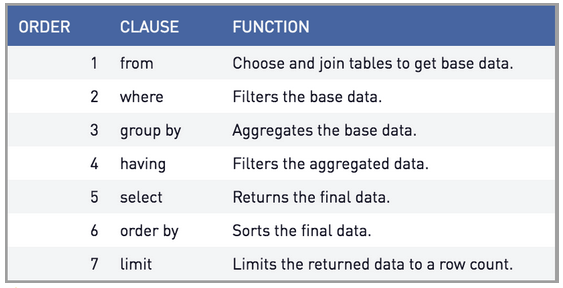

https://www.sisense.com/blog/sql-query-order-of-operations/

### SQL Injection

When submitting the registration form, the server executes something like this:

```sql
INSERT INTO Students (last_name, first_name)
VALUES('{last_name}', '{first_name}')
```

With the input Robert'); DROP TABLE Students; --, the SQL query executed is:

```sql
INSERT INTO students (last_name, first_name)
VALUES('Smith', 'Robert'); DROP TABLE Students; --');
```

**which will delete the Students table from the database!!!**

ℹ️ This exploit does not work on SQLite if you use execute() but does if you use executescript() (cf Documentation)

https://docs.python.org/3.7/library/sqlite3.html#sqlite3.Cursor.execute

#### Exploit example

Let's create an exploitable_db.sqlite with the following code:

In [48]:
import sqlite3

conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

c.execute("""
CREATE TABLE users(
    id         INTEGER      PRIMARY KEY AUTOINCREMENT,
    username   VARCHAR(100) UNIQUE,
    password   VARCHAR(100)
)
""")

USERS = [
    ('john', 'passw0rd'),
    ('paul', 'supers3cret')
]

for user in USERS:
    c.execute("INSERT INTO users (username, password) VALUES (?, ?)", user)
    conn.commit()

conn.close()

You can use the code below to check it out from terminal

```cli
sqlite3 data/exploitable_db.sqlite
```

```sql
.headers on
.mode column
SELECT * FROM users;
.quit
```

In [50]:
import sqlite3
conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

def connect(username, password):
    query = f"""
        SELECT *
        FROM users
        WHERE users.username = '{username}'
        AND users.password = '{password}'
    """
    c.execute(query)
    user = c.fetchone()
    if user is None:
        return "Unauthorized"
    else:
        return "Authorized"

print(connect("john", "wrong_password"))
print(connect("john", "passw0rd"))

Unauthorized
Authorized


**EXPLOIT**

In [52]:
print(connect("john", "'OR 1=1 --"))  # 😱

Authorized


#### Use parameter substitution ✅

In [53]:
import sqlite3

conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

def connect_safe(username, password):
    query = """
        SELECT *
        FROM users
        WHERE users.username = ?
        AND users.password = ?
    """
    c.execute(query, (username, password))
    user = c.fetchone()
    if user is None:
        return "Unauthorized"
    else:
        return "Authorized"

In [54]:
print(connect_safe("john", "wrong_password"))
print(connect_safe("john", "passw0rd"))

Unauthorized
Authorized


In [55]:
print(connect_safe("john", "'OR 1=1 --"))

Unauthorized


### CRUD

    - Create
    - Update
    - Delete

In [96]:
# Create/reset database to edit

import sqlite3

conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Check if the food table already exists

query = """
        SELECT name 
        FROM sqlite_master
        WHERE type='table';
    """

c.execute(query)
tables = c.fetchall()

if tables == []:
    
    print('Creating New Table')
    
    c.execute("""
    CREATE TABLE food(
        id         INTEGER      PRIMARY KEY AUTOINCREMENT,
        food_name  VARCHAR(100) UNIQUE,
        food_type  VARCHAR(100),
        healthy    VARCHAR(100), 
        desc       VARCHAR(100)
    )
    """)

    FOODS = [
        ('cheddar', 'dairy', 'kind_of', 'can vary in sharpness of taste'),
        ('carrots', 'vegetable', 'yes', 'orange vegetable'),
        ('steak', 'mean', 'kind_of', 'normally beef')
    ]

    for food in FOODS:
        c.execute("INSERT INTO food (food_name, food_type, healthy, desc) VALUES (?, ?, ?, ?)", food)
        conn.commit()

    conn.close()

elif 'food' in tables[0]:
    
    print('CRUD database already exists with food table\n')
    
    query = '''
        SELECT *
        FROM food
    '''

    c.execute(query)
    rows = c.fetchall()

    print(f'Current Table')
    print(rows)
    
else: 
    print('We Have A Problem...')


CRUD database already exists with food table

Current Table
[(1, 'cheddar', 'dairy', 'kind_of', 'can vary in sharpness of taste'), (2, 'carrots', 'vegetable', 'yes', 'orange vegetable'), (3, 'steak', 'mean', 'kind_of', 'normally beef')]


In [97]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')
rows

Rows Returned: 3


[(1, 'cheddar', 'dairy', 'kind_of', 'can vary in sharpness of taste'),
 (2, 'carrots', 'vegetable', 'yes', 'orange vegetable'),
 (3, 'steak', 'mean', 'kind_of', 'normally beef')]

#### CREATE

```sql
INSERT INTO table (column1, column2, ...)
VALUES(value1, value2 , ...)
```

Insert a new row (a tuple of values) into a given table:

In [98]:
# Connect to database
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Create new food items

query = '''
    INSERT INTO food (food_name, food_type, healthy, desc)
    VALUES ('chocolate_cake', 'desert', 'no', 'sweet chocolatey goodness')
'''

c.execute(query)

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 4


[(1, 'cheddar', 'dairy', 'kind_of', 'can vary in sharpness of taste'),
 (2, 'carrots', 'vegetable', 'yes', 'orange vegetable'),
 (3, 'steak', 'mean', 'kind_of', 'normally beef'),
 (4, 'chocolate_cake', 'desert', 'no', 'sweet chocolatey goodness')]

#### UPDATE

Update a row (or rows) in table:

```sql
UPDATE table
SET column_1 = new_value_1,
    column_2 = new_value_2
WHERE
    search_condition
```

example:

```sql
UPDATE Country
SET
    name = 'République Française'
WHERE
    id = 4769

```


In [99]:
# Connect to database
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Correct the error in the steak item

query = '''
    UPDATE food
    SET
        food_type = 'meat', 
        healthy = 'no'
    WHERE 
        food_name = 'steak'
'''

c.execute(query)

# Commit the changed table to the database
conn.commit()

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 3


[(1, 'cheddar', 'dairy', 'kind_of', 'can vary in sharpness of taste'),
 (2, 'carrots', 'vegetable', 'yes', 'orange vegetable'),
 (3, 'steak', 'meat', 'no', 'normally beef')]

#### DELETE

Deleting a row (or rows) from table:

```sql
DELETE FROM table
WHERE search_condition
```

Example:

```sql
DELETE FROM Country
WHERE id = 4769
```

In [100]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Keep only the healthy food

query = '''
    DELETE FROM food
    WHERE healthy != 'yes'
'''

c.execute(query)

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 1


[(2, 'carrots', 'vegetable', 'yes', 'orange vegetable')]

### Cleaning Data

#### String Functions



In [116]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        UPPER(food.food_name),
        food.food_type,
        food.healthy,
        food.desc
    FROM food
'''

c.execute(query)
rows = c.fetchall()

for row in rows:
    print(row)

('CHEDDAR', 'dairy', 'kind_of', 'can vary in sharpness of taste')
('CARROTS', 'vegetable', 'yes', 'orange vegetable')
('STEAK', 'meat', 'no', 'normally beef')


### Other Misc. Stuff

#### How to list tables using SQLite3 in Python

In [92]:
# Importing Sqlite3 Module
import sqlite3
 
try:
    sqliteConnection = sqlite3.connect('data/soccer.sqlite')
     
    print("Connected to SQLite\n")
 
    # Getting all tables from sqlite_master
    
    sql_query = """
        SELECT name 
        FROM sqlite_master
        WHERE type='table';
    """
 
    # Creating cursor object using connection object
    
    cursor = sqliteConnection.cursor()
    cursor.execute(sql_query)
    
    print("List of tables\n")
    print(cursor.fetchall())

except sqlite3.Error as error:
    print("Failed to execute the above query", error)
     
finally:
   
    # Inside Finally Block, If connection is
    # open, we need to close it
    if sqliteConnection:
         
        sqliteConnection.close()
        print("\nthe sqlite connection is closed")

Connected to SQLite

List of tables

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]

the sqlite connection is closed
